In [ ]:
# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [4]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

^C


### 1.2 Collect Images Using OpenCV

In [99]:
import os
import time
import uuid
import cv2

In [7]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [8]:
# taking image every 0.5 seconds for the training of model
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f

### 1.3 Annotate Images with LabelMe

In [9]:
!pip install labelme

  Using cached labelme-5.3.1-py3-none-any.whl
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Obtaining dependency information for imgviz>=0.11 from https://files.pythonhosted.org/packages/20/23/ec40e1bc6b83ae33970ba9e9a6622d1b1f4357a3ff2b1fb5d87b0445ffa5/imgviz-1.7.4-py3-none-any.whl.metadata
  Using cached imgviz-1.7.4-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for natsort>=7.1.0 from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for onnxruntime>=1.14.1 from https://files.pythonhosted.org/packages/49/bd/a00f271510098ee62c097ecec663484ff12de632bea1bcaa02ea3679cd03/onnxruntime-1.16.3-cp311-cp311-win_amd64.whl.metadata
  Using cached onnxruntime-1.16.3-cp311-cp311-win_amd64.whl.metadata (4.5 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using

In [10]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\anshu\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [10]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [12]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### 2.3 Load Image into TF Data Pipeline

In [22]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')
# Converting the image pointer to an actual image (in form of RGB values)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [23]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [24]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [21]:
# .map loads the function passed for every dataset.
images = images.map(load_image)
# images is now a tensorflow data pipeline

NameError: name 'images' is not defined

In [17]:
images.as_numpy_iterator().next()

array([[[203, 189, 186],
        [204, 190, 187],
        [203, 192, 188],
        ...,
        [234, 226, 224],
        [240, 232, 230],
        [241, 233, 231]],

       [[202, 188, 185],
        [202, 188, 185],
        [202, 191, 187],
        ...,
        [234, 226, 224],
        [240, 232, 230],
        [241, 233, 231]],

       [[205, 191, 188],
        [205, 191, 188],
        [205, 191, 188],
        ...,
        [236, 228, 226],
        [239, 231, 229],
        [241, 233, 231]],

       ...,

       [[ 74,  77, 118],
        [ 73,  76, 117],
        [ 68,  73, 115],
        ...,
        [193, 171, 150],
        [196, 173, 155],
        [198, 175, 157]],

       [[ 69,  74, 116],
        [ 63,  68, 110],
        [ 62,  67, 109],
        ...,
        [194, 169, 149],
        [196, 170, 153],
        [198, 172, 155]],

       [[ 62,  69, 111],
        [ 60,  67, 109],
        [ 60,  65, 107],
        ...,
        [196, 171, 151],
        [197, 171, 154],
        [199, 173, 156]]

In [18]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [19]:
 # creates an object to return images in a group or batch of 4
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
# returns images in batches of 4
plot_images = image_generator.next()

In [21]:
print(plot_images)

[[[[160 149 145]
   [159 148 144]
   [160 149 145]
   ...
   [187 177 176]
   [193 183 182]
   [196 186 185]]

  [[160 149 145]
   [160 149 145]
   [160 149 145]
   ...
   [190 180 179]
   [188 178 177]
   [197 187 186]]

  [[161 150 146]
   [160 149 145]
   [160 149 145]
   ...
   [188 178 177]
   [192 184 182]
   [194 186 184]]

  ...

  [[ 33  37  64]
   [ 31  35  62]
   [ 32  38  64]
   ...
   [217 205 207]
   [217 205 207]
   [217 205 207]]

  [[ 29  33  62]
   [ 22  26  55]
   [ 25  29  58]
   ...
   [216 204 206]
   [217 205 207]
   [217 205 207]]

  [[ 22  26  55]
   [ 23  27  56]
   [ 18  21  52]
   ...
   [216 204 206]
   [216 204 206]
   [216 204 206]]]


 [[[205 191 188]
   [204 190 187]
   [204 190 187]
   ...
   [233 224 225]
   [235 226 227]
   [235 226 227]]

  [[205 191 188]
   [205 191 188]
   [205 191 188]
   ...
   [233 224 225]
   [235 226 227]
   [240 231 232]]

  [[205 191 188]
   [205 191 188]
   [205 191 188]
   ...
   [235 226 227]
   [236 227 228]
   [241 232

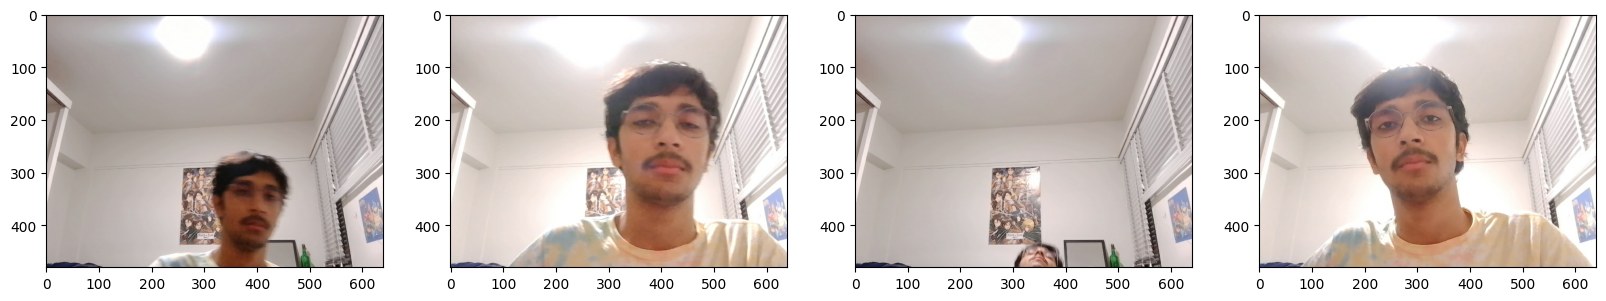

In [22]:
# creating an actual physical image by plotting it on matplotlib
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [23]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [24]:
import albumentations as alb

In [28]:
# checking the image height and width to make sure random crop works right
x = cv2.imread(os.path.join('data','train','images','5bce0316-8a80-11ee-8581-581cf8b7e3c7.jpg'))
x.shape

(480, 640, 3)

In [29]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [30]:
img = cv2.imread(os.path.join('data','train', 'images','5bce0316-8a80-11ee-8581-581cf8b7e3c7.jpg'))

In [31]:
with open(os.path.join('data', 'train', 'labels', '5bce0316-8a80-11ee-8581-581cf8b7e3c7.json'), 'r') as f:
    label = json.load(f)

In [32]:
label['shapes'][0]['points']

[[321.8987341772152, 243.7974683544304],
 [493.4177215189873, 454.5569620253165]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [33]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [34]:
coords

[321.8987341772152, 243.7974683544304, 493.4177215189873, 454.5569620253165]

In [35]:
coords = list(np.divide(coords, [640,480,640,480]))

In [36]:
coords

[0.5029667721518988,
 0.5079113924050633,
 0.7709651898734177,
 0.9469936708860761]

### 4.4 Apply Augmentations and View Results

In [37]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [38]:
augmented['bboxes'][0][2:]

(0.6780028129395217, 0.48489451476793244)

In [39]:
augmented['bboxes']

[(0.2968495077355837,
  0.01654008438818555,
  0.6780028129395217,
  0.48489451476793244)]

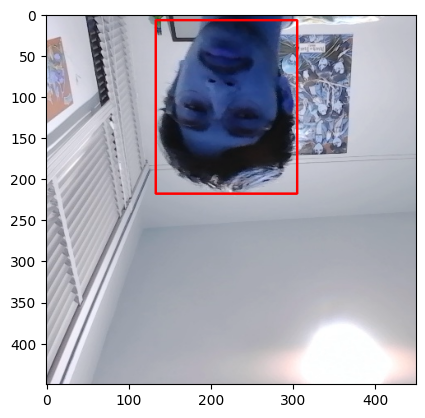

In [40]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [11]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'au

### 5.2 Load Augmented Images to Tensorflow Dataset

In [25]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [26]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [27]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [28]:
train_images.as_numpy_iterator().next()

array([[[0.12248775, 0.32199755, 0.14307599],
        [0.17610294, 0.36286765, 0.19865195],
        [0.07990196, 0.17101716, 0.04669118],
        ...,
        [0.25753677, 0.27322304, 0.37420344],
        [0.13817401, 0.16452205, 0.2651348 ],
        [0.09846814, 0.12291667, 0.24656862]],

       [[0.18541667, 0.37120098, 0.18933824],
        [0.10171568, 0.2870098 , 0.11299019],
        [0.02665441, 0.15012255, 0.0158701 ],
        ...,
        [0.14368872, 0.14234069, 0.2329657 ],
        [0.13541667, 0.13835785, 0.2432598 ],
        [0.159375  , 0.16329657, 0.26917893]],

       [[0.17953432, 0.40759805, 0.18970588],
        [0.21292892, 0.43541667, 0.21991421],
        [0.10741422, 0.28933823, 0.09705883],
        ...,
        [0.61746323, 0.5983456 , 0.5885417 ],
        [0.6376838 , 0.61807597, 0.60974264],
        [0.6814951 , 0.6599265 , 0.6666667 ]],

       ...,

       [[0.7237132 , 0.68449754, 0.6766544 ],
        [0.72199756, 0.68376225, 0.6754289 ],
        [0.7254902 , 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [29]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [30]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [32]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3335 , 0.07623, 0.7217 , 0.508  ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [34]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 840, 840, 780, 780)

### 7.2 Create Final Datasets (Images/Labels)

In [35]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [36]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [37]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [38]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.1675, 0.4456, 0.83  ],
        [0.883 , 0.3257, 1.    , 0.786 ],
        [0.442 , 0.5083, 0.823 , 0.9766],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.1852, 0.4922, 0.848 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.7485, 0.2827, 1.    ]], dtype=float16))

### 7.3 View Images and Annotations

In [39]:
data_samples = train.as_numpy_iterator()

In [40]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


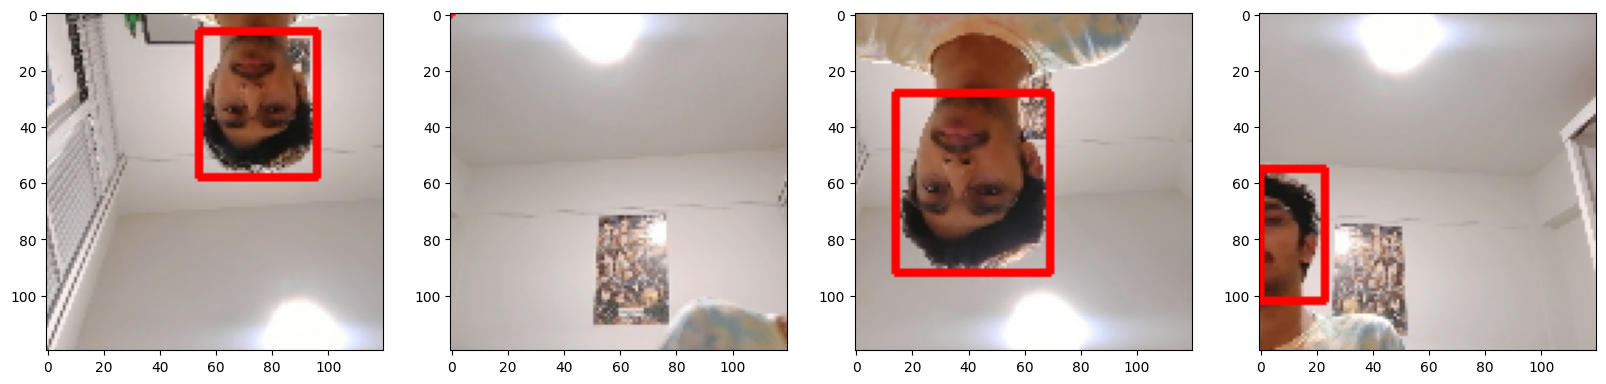

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [43]:
vgg = VGG16(include_top=False)

In [44]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [45]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [46]:
facetracker = build_model()

In [47]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [48]:
X, y = train.as_numpy_iterator().next()

In [49]:
X.shape

(8, 120, 120, 3)

In [50]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 368ms/step


In [51]:
classes, coords

(array([[0.39899287],
        [0.31933182],
        [0.34633303],
        [0.27733234],
        [0.3674519 ],
        [0.39999154],
        [0.37988654],
        [0.40256304]], dtype=float32),
 array([[0.4974691 , 0.4796221 , 0.612272  , 0.3609545 ],
        [0.5175008 , 0.56205046, 0.6464634 , 0.33632052],
        [0.50713617, 0.44152135, 0.63478637, 0.3607407 ],
        [0.49910986, 0.5902709 , 0.68222183, 0.39649993],
        [0.5121096 , 0.55957353, 0.59309125, 0.37583104],
        [0.43797153, 0.44323346, 0.60277116, 0.29352063],
        [0.4593857 , 0.5812876 , 0.6576639 , 0.30004248],
        [0.5666806 , 0.5960647 , 0.688543  , 0.31700748]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [52]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [55]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [56]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [57]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [58]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.595429>

In [59]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9736031>

In [60]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.595429>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [61]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [62]:
model = FaceTracker(facetracker)

In [63]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [64]:
logdir='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
450/450 [==============================] - 202s 441ms/step - total_loss: 0.4381 - class_loss: 0.1084 - regress_loss: 0.3839 - val_total_loss: 0.0528 - val_class_loss: 2.4215e-05 - val_regress_loss: 0.0528
Epoch 2/10
450/450 [==============================] - 194s 428ms/step - total_loss: 0.1668 - class_loss: 0.0537 - regress_loss: 0.1400 - val_total_loss: 0.0077 - val_class_loss: 4.5257e-05 - val_regress_loss: 0.0077
Epoch 3/10
450/450 [==============================] - 207s 455ms/step - total_loss: 0.1246 - class_loss: 0.0463 - regress_loss: 0.1015 - val_total_loss: 0.0130 - val_class_loss: 9.0749e-06 - val_regress_loss: 0.0130
Epoch 4/10
450/450 [==============================] - 206s 447ms/step - total_loss: 0.1035 - class_loss: 0.0355 - regress_loss: 0.0858 - val_total_loss: 0.0067 - val_class_loss: 1.3426e-05 - val_regress_loss: 0.0067
Epoch 5/10
450/450 [==============================] - 196s 432ms/step - total_loss: 0.0847 - class_loss: 0.0318 - regress_loss: 0.0688 -

### 10.3 Plot Performance

In [67]:
hist.history

{'total_loss': [0.11723947525024414,
  0.02594773843884468,
  0.06596650183200836,
  0.016636161133646965,
  0.013775146566331387,
  0.023255839943885803,
  0.01467161625623703,
  0.007658193353563547,
  0.006251782178878784,
  0.005746942013502121],
 'class_loss': [0.04131471365690231,
  0.00033928605262190104,
  0.007305582519620657,
  0.0018463310552760959,
  0.00046978602767921984,
  0.014607719145715237,
  0.00025018147425726056,
  0.004328541457653046,
  0.0006252377643249929,
  0.0003222587693016976],
 'regress_loss': [0.09658211469650269,
  0.025778096169233322,
  0.062313709408044815,
  0.01571299508213997,
  0.013540253974497318,
  0.015951979905366898,
  0.014546525664627552,
  0.005493922624737024,
  0.005939163267612457,
  0.005585812497884035],
 'val_total_loss': [0.05279956012964249,
  0.0076943510212004185,
  0.013035988435149193,
  0.006715483032166958,
  0.011053369380533695,
  0.007837595418095589,
  0.006098500452935696,
  0.012149631045758724,
  0.00773718254640698

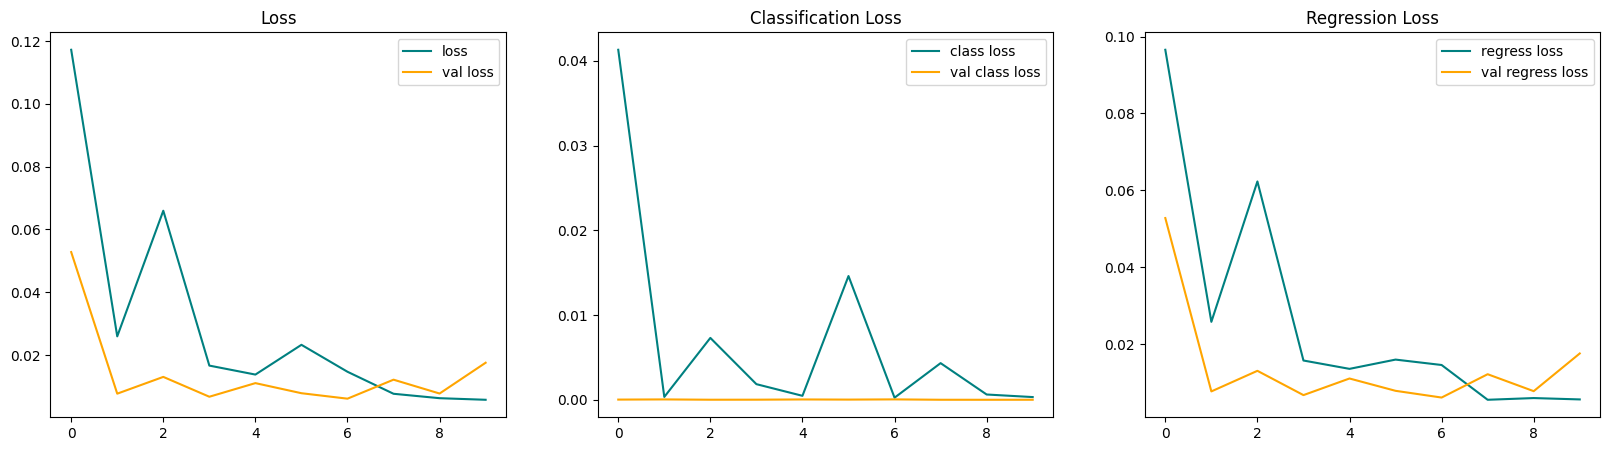

In [68]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [69]:
test_data = test.as_numpy_iterator()

In [70]:
test_sample = test_data.next()

In [71]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 541ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


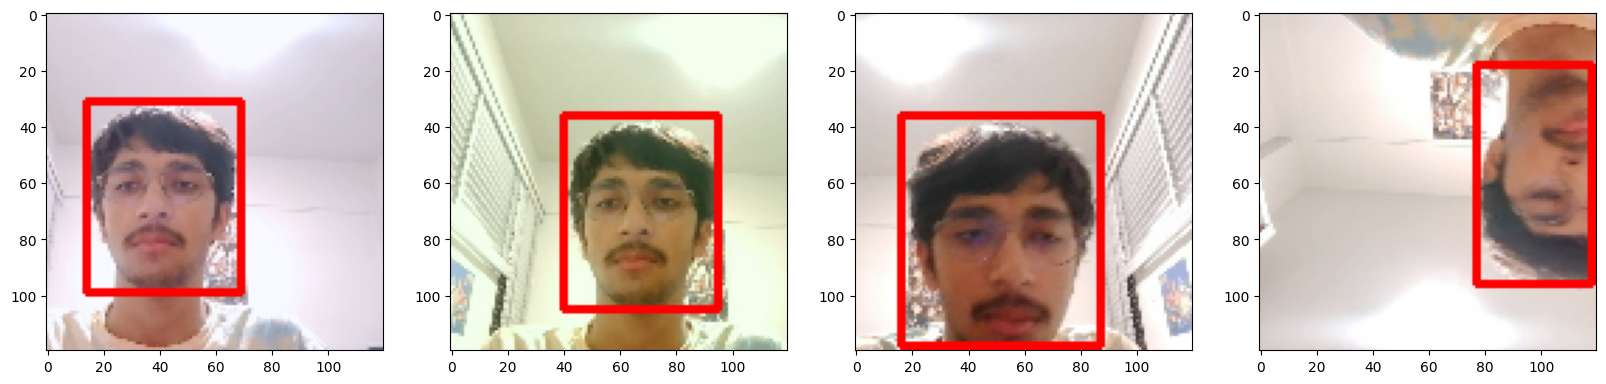

In [72]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [79]:
facetracker.save('facetracker.h5')

In [2]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [1]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

In [6]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1700)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 850)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:1080, 210:1920, :]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.7: # If the prediction is good, then crop.
        valtop = list(np.multiply(sample_coords[:2], [1700,1080]).astype(int))
        valbot = list(np.multiply(sample_coords[2:], [1700,1080]).astype(int))
        valtop = (valtop[0] - 40,valtop[1] - 80)
        valbot = (valbot[0] + 20,valbot[1] + 60)
        frame = frame[valtop[1]:valbot[1],valtop[0]:valbot[0]]
        #cv2.rectangle(frame,valtop,valbot,(255,0,0), 2)
        
    cv2.imshow('CenterStage', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 42ms/step
